# Data Analysis - Deusto

In this notebook, the data resulting from the experiment with the AR Geography App in the *Deusto* school will be analysed. The data includes both the raw data compiled from the app and the student surveys. There are two types of students based on the device they use during the experiment: PC (they can see what other students do and provide suggestions) or mobile (they can also receive questions from the teacher and answer them). After the trial, the students were given a survey consisting of a number of questions, which they had to rate from 1 to 5. There were 16 common questions, 2 questions phrased slightly differently for mobile/PC users, and 2 questions only for mobile users. 9 of the students used a mobile device (when analysing the app data we will count them as 8 students, as one student left the experiment), while 1 student used a PC.

The analysis performed here is structured the same way as the analysis data in the [notebook](./Data_Analysis_Salesianos.ipynb) with the analysis of the data from the *Salesianos* school

## Student Surveys

In this section we will analyse the student surveys that were completed after the experiment. This part of the analysis will focus on the common questions first, and later on the questions answered only by students using a mobile device. The 2 questions phrased differently are #18 and #20:

* Being able to use augmented reality / 3D elements makes the application more entertaining
* Thanks to augmented reality / 3D elements I have felt immersed in the learning activity

Where the words "augmented reality" were used in the questionnaires filled by the students using a mobile device, and "3D elements" in case of students on PC.

In [1]:
# Before starting, let's add the magics to use help from ChatGPT
%load_ext ask_ai.magics

# And import the necessary libraries. xapi_analysis is the package we created to help analysing xapi statements
from xapi_analysis.input_csv import *
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Let's also set some useful display constants for pandas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500

# And something for plotting better images, too.
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 18     # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 13    # legend fontsize
plt.rcParams['font.size'] = 13
cmap = sns.color_palette('icefire', as_cmap=True)

In [2]:
SURVEY_FILE = Path('./questionnaire_answers.xlsx')
SHEET_NAME = 'DEUSTO'
NUM_ROWS = 22
COLS = list(range(14))
COLS.pop(1) # remove second index from excel

survey_answers = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAME, index_col=0, nrows=NUM_ROWS, 
                               usecols=COLS)

In [3]:
survey_answers.head(3)

,QUESTIONS,Type,iPad101,Tablet101,Tablet102,iPhone101,iPhone102,Android101,Android102,Android103,Android104,PC010
Q-M,,,,,,,,,,,,
1,I think that I would like to use the application frequently.,Collaboration,4,3,4,4,4,3,4,4,3,1.0
2,I found the application to be simple.,Usability,5,4,4,4,5,4,4,5,3,3.0
3,I thought the application was easy to use.,Usability,4,4,4,4,4,3,4,4,4,4.0


Let's check which questions have achieved the greates score

In [4]:
survey_answers['mean'] = survey_answers.mean(numeric_only=True, axis=1)
questions_avg = survey_answers[["QUESTIONS", "mean"]]
questions_avg = questions_avg.sort_values("mean")
questions_avg

,QUESTIONS,mean
Q-M,,
15,Suggestions from my classmates have helped me when answering the exercise,3.333333
1,I think that I would like to use the application frequently.,3.400000
10,I would like to use the application during a test,3.600000
4,I think that I could use the application without the support of a technical person.,3.700000
8,I felt very confident using the application.,3.700000
9,I could use the application without having to learn anything new.,3.700000
5,I found the various functions in the application were well integrated,3.800000
6,I would imagine that most people would learn to use the application very quickly.,3.800000
16,The device used has allowed me to use the application easily,3.800000


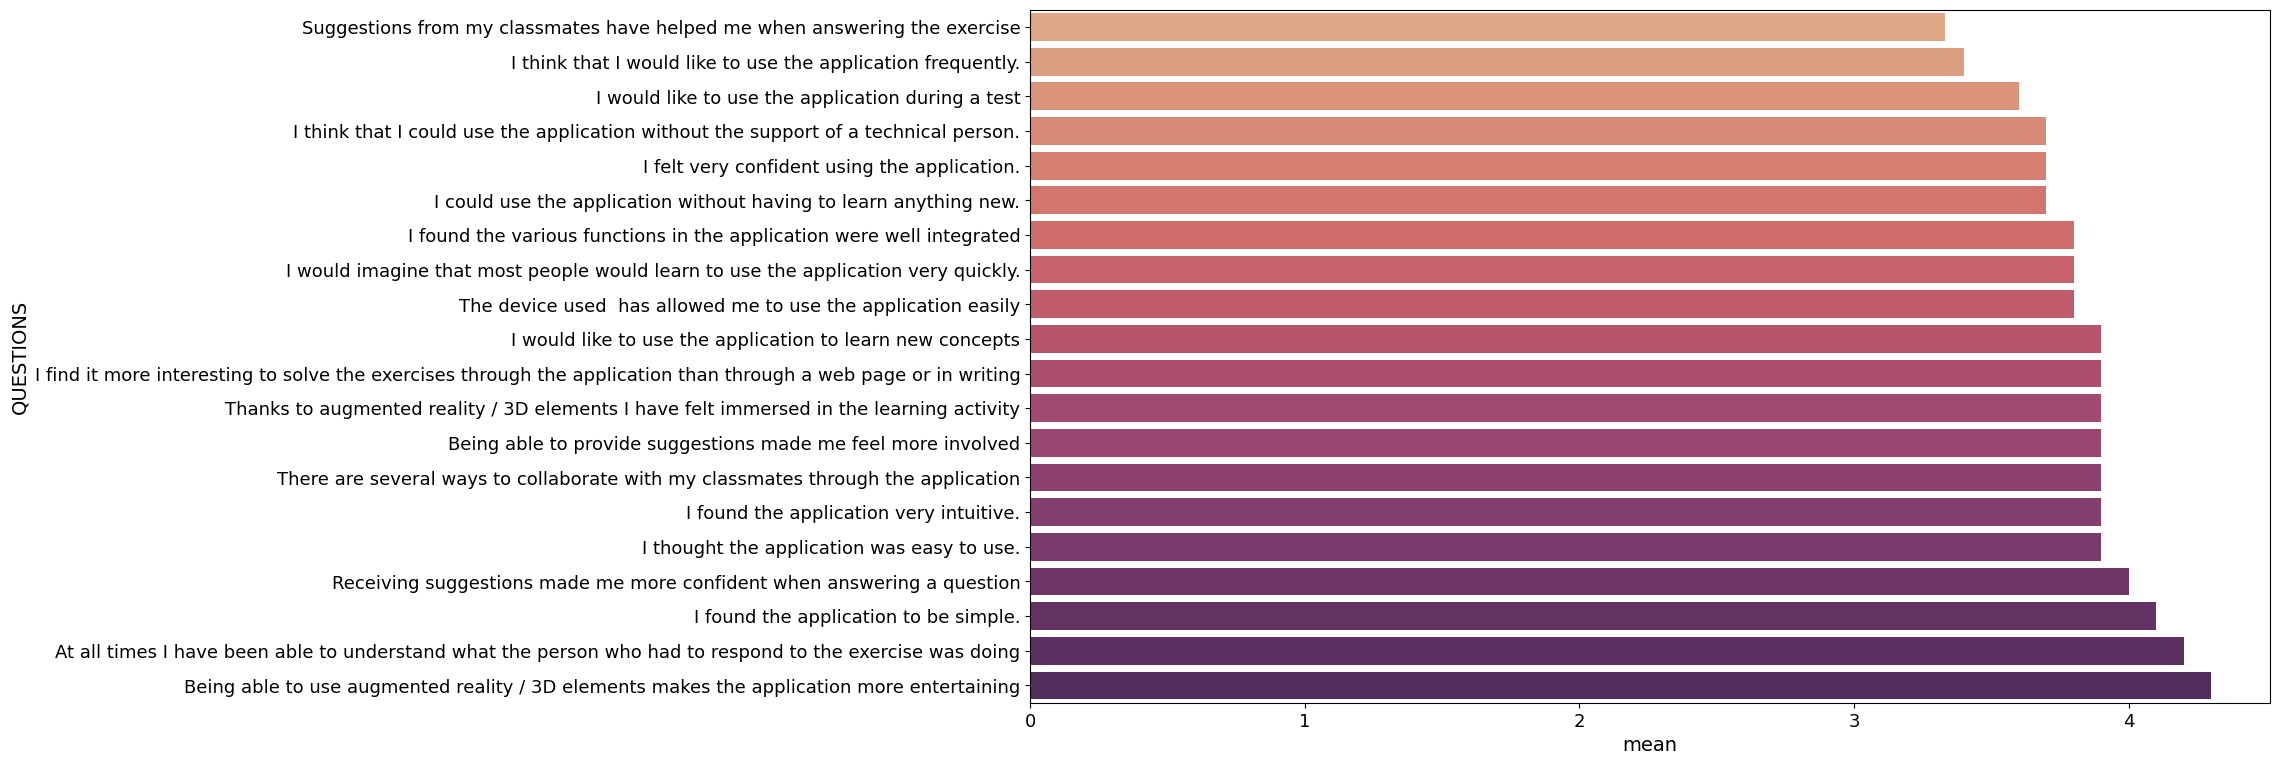

In [5]:
create_barplot(questions_avg, 'mean', 'QUESTIONS')

Let's check better the questions who received the top and bottom scores

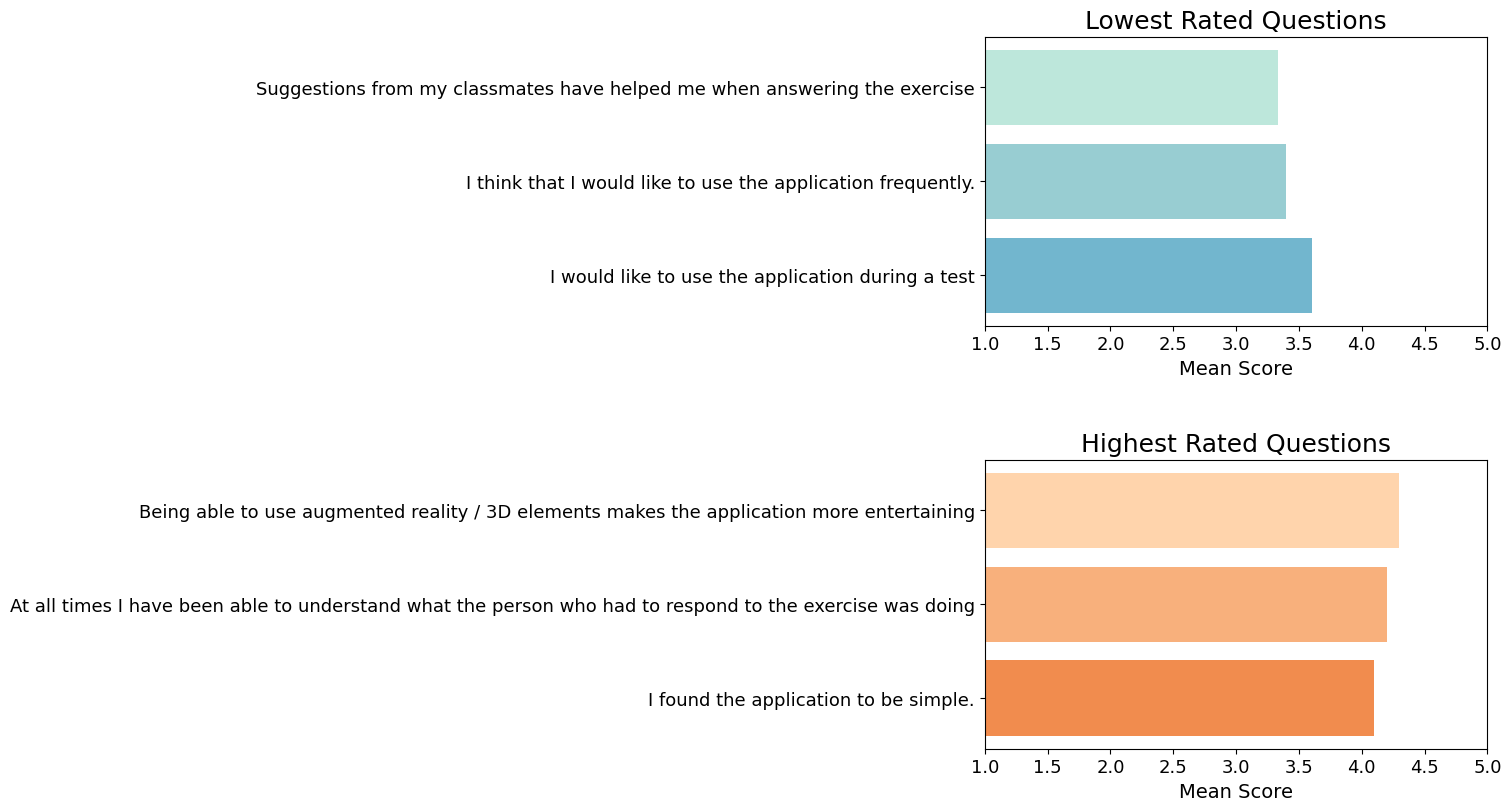

In [6]:
f, axs = plt.subplots(2,1)

colors = [cmap(i) for i in np.linspace(0, 1, len(questions_avg))]

axs[0].barh(questions_avg['QUESTIONS'].iloc[:3], questions_avg['mean'].iloc[:3], color=colors[:3], align='center')
axs[0].set_title('Lowest Rated Questions')
axs[0].set_xlabel('Mean Score')
axs[0].set_xlim(1,5)
axs[0].invert_yaxis()

axs[1].barh(questions_avg['QUESTIONS'].iloc[-3:], questions_avg['mean'].iloc[-3:], color=colors[-3:], align='center')
axs[1].set_title('Highest Rated Questions')
axs[1].set_xlabel('Mean Score')
axs[1].set_xlim(1,5)

f.tight_layout(pad=3.0)

plt.show()

Now let's analyse the same data from the perspective of the students.

In [7]:
students_avg = survey_answers.drop(["QUESTIONS", "Type"], axis=1)
student_list = students_avg.mean().sort_values()
student_list = pd.DataFrame(student_list).reset_index()
student_list.columns = ["Student", "mean"]
student_list

,Student,mean
0,PC010,2.666667
1,Android101,3.100000
2,iPhone101,3.700000
3,Android104,3.750000
4,mean,3.836667
5,Tablet101,3.900000
6,iPad101,4.000000
7,Tablet102,4.100000
8,Android103,4.250000
9,iPhone102,4.400000


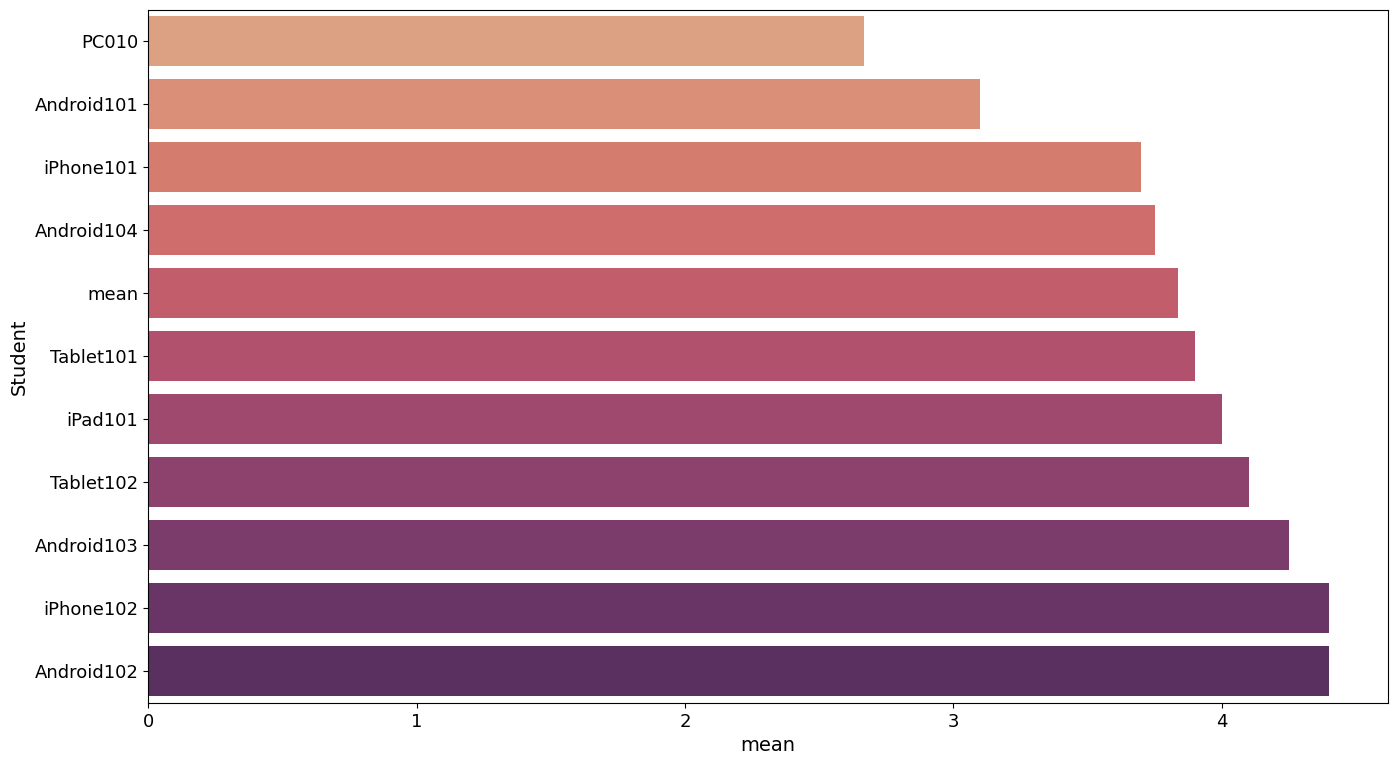

In [8]:
create_barplot(student_list, 'mean', 'Student')

Unlike the analysis of the data of the students from the previous school, here it is clear that the student on PC gave a worse average response than the mobile users. One possibility is that, as he was the only student on PC, the experience could not have been as enjoyable.

In [25]:
mobile_list = student_list[student_list["Student"].str.startswith(("Android", "iPhone", "iPad", "Tablet"))]
pc_list = student_list[student_list["Student"].str.startswith(("PC"))]
mobile_list_mean = mobile_list["mean"].mean()
print(f"Mobile-only average score: {mobile_list_mean}")

Mobile-only average score: 3.9555555555555557


Indeed, the averagwe score for students on mobile devices is more than 1 point higher than the average answer score from the only user who used a PC.

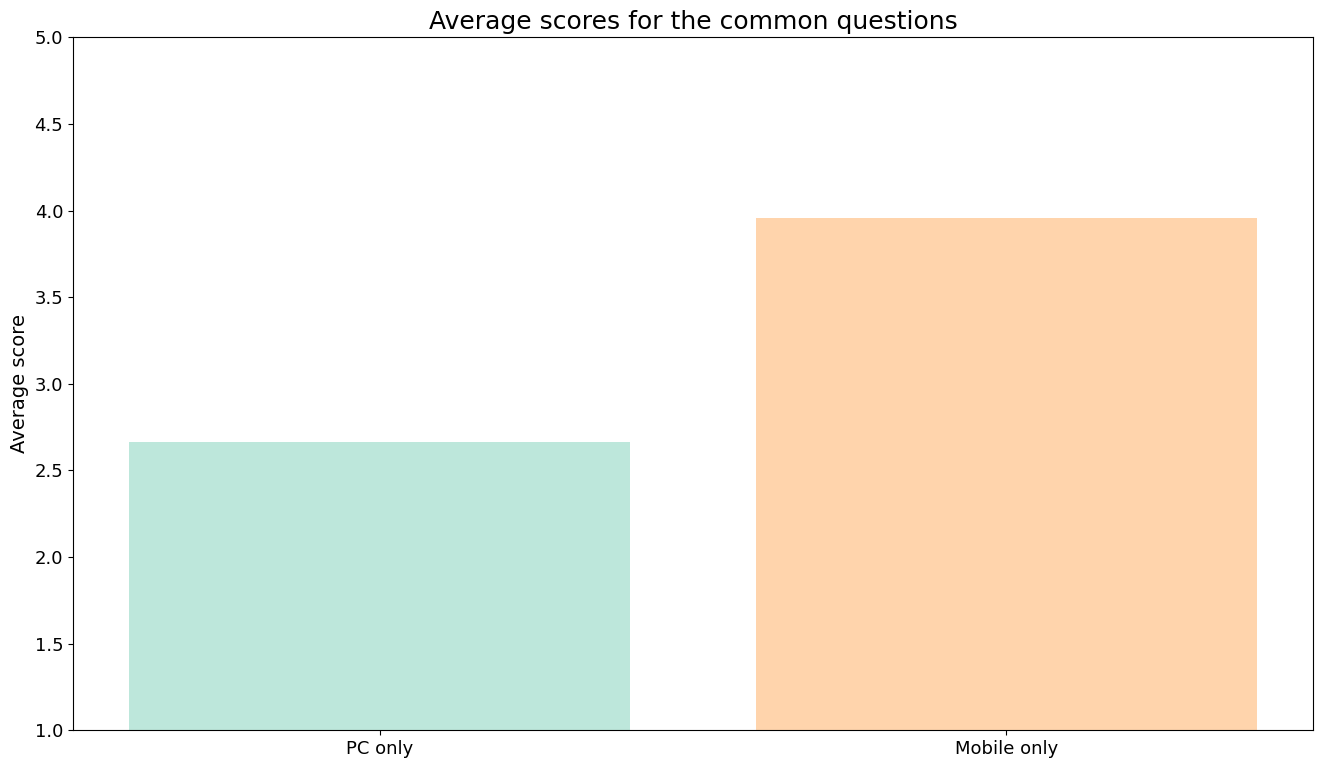

In [24]:
names = ["PC only", "Mobile only"]
pc_list_mean = student_list['mean'][0]
values = [pc_list_mean, mobile_list_mean]
colors = [cmap(i) for i in np.linspace(0, 1, len(values))]

plt.bar(names, values, color=colors)
plt.title("Average scores for the common questions")
plt.ylabel("Average score")
plt.ylim(1,5)
plt.show()

Let's analyze the answers, but grouped by question type, now. There are 4 questions types:

* Collaboration: Collaborative aspects of the app
* Functionality: App Functionalities
* Usability: App Usability
* Education: Interest as educational tool

In [11]:
students_q_type = survey_answers[["Type", "mean"]]
students_q_type = students_q_type.groupby("Type", as_index=False)["mean"].mean().sort_values("mean")
students_q_type

,Type,mean
0,Collaboration,3.788889
2,Functionality,3.800000
3,Usability,3.825000
1,Education,3.920000


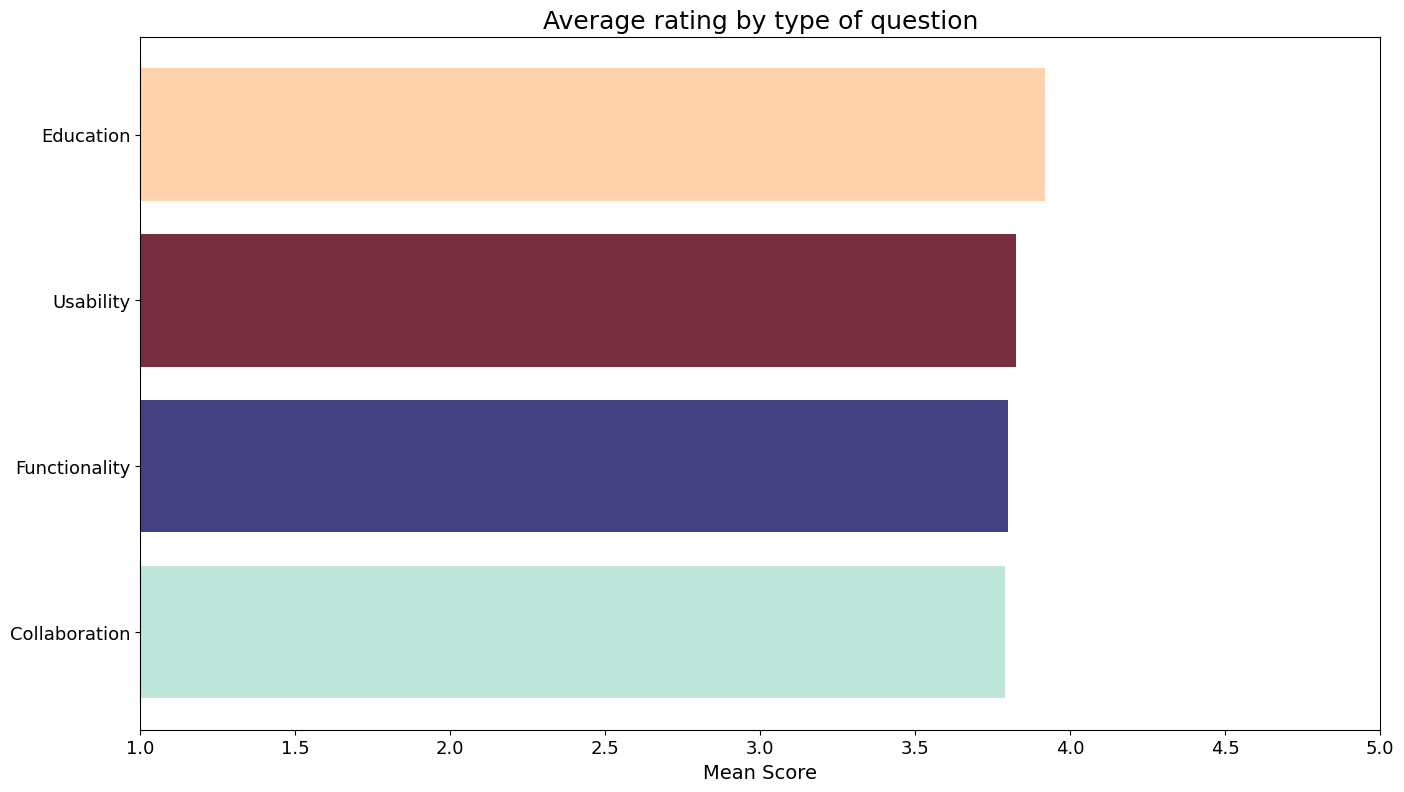

In [12]:
colors = [cmap(i) for i in np.linspace(0, 1, len(students_q_type))]

fig = plt.figure()
plt.barh(students_q_type['Type'], students_q_type['mean'], color=colors, align='center')
plt.title('Average rating by type of question')
plt.xlabel('Mean Score')
plt.xlim(1,5)
plt.show()

There is not much variability in the answers by type, but nonetheless the highest rated ones are the **Education** ones, while the lowest score is for the **Collaboration** ones. In the study in the previosu schhol, **Collaboration** questions achieved the highest score!

## xAPI statements analysis

Let's analyze now the xAPI statements collected automatically through the application.

In [13]:
deusto_xapi = pd.read_csv('statements_deusto_clean.csv', index_col=0).reset_index(drop=True)
deusto_xapi.head()

,timestamp,stored,actor,verb,object,result
0,2023-05-09 06:14:34.396000+00:00,2023-05-09T06:14:34.396Z,Android102,Logged In,Deusto,"{""score"":{""raw"":0}}"
1,2023-05-09 06:14:50.827000+00:00,2023-05-09T06:14:50.827Z,Android101,Logged In,Deusto,"{""score"":{""raw"":0}}"
2,2023-05-09 06:14:58.188000+00:00,2023-05-09T06:14:58.188Z,Tablet101,Logged In,Deusto,"{""score"":{""raw"":0}}"
3,2023-05-09 06:15:25.807000+00:00,2023-05-09T06:15:25.807Z,iPad101,Logged In,Deusto,"{""score"":{""raw"":0}}"
4,2023-05-09 06:15:36.016000+00:00,2023-05-09T06:15:36.016Z,Android104,Logged In,Deusto,"{""score"":{""raw"":0}}"


#### 1) Student interactions with the app (and how they correlate with the survey answers)

We will start the app data analysis by looking at the number of total interactions that the students had. First, we have to clean the dataset because the actor column includes some wrong names (as one user made an error when logging to the app).

In [14]:
deusto_xapi["actor"].unique()

array(['Android102', 'Android101', 'Tablet101', 'iPad101', 'Android104',
       'Tablet102', 'Teacher', 'iPhone102', 'AR4Education', 'Iphone101',
       'pc010', 'Iphone 101', 'iphone102'], dtype=object)

As expected, there is one user, *AR4Education* who should have logged in as *Android103*. Furthermore, one user logged in once as *Iphone101* and once as *Iphone101*. We will rename both to *iPhone101*, to be consistent with the format in the surveys.

In [18]:
deusto_xapi = deusto_xapi.replace({"actor": {"Iphone 101": "iPhone101",
                                   "Iphone101": "iPhone101",
                                   "AR4Education": "Android103",
                                   "pc010": "PC010",
                                   "iphone102": "iPhone102"}})                    
deusto_xapi["actor"].unique()           

array(['Android102', 'Android101', 'Tablet101', 'iPad101', 'Android104',
       'Tablet102', 'Teacher', 'iPhone102', 'Android103', 'iPhone101',
       'PC010'], dtype=object)

We won't count "Logged In" or "Logged Out" as interactions, since they do not contribute to the real use of the app:

In [19]:
actions = ["Logged In", "Logged Out"]
students_app_interactions = deusto_xapi[~deusto_xapi['verb'].isin(actions)]
students_app_interactions["verb"].unique()

array(['Placed', 'Swiped', 'Asked', 'Started', 'Set Turn', 'Accepted',
       'Suggested', 'Sent', 'Checked', 'Assigned', 'Ran Out', 'Canceled',
       'Ended'], dtype=object)

In [20]:
interactions = students_app_interactions.groupby(['actor'])["verb"].agg(['count']).sort_values("count")
interactions

,count
actor,
PC010,57
iPhone101,100
Android103,101
iPad101,101
Android102,104
Tablet101,126
iPhone102,135
Tablet102,140
Android101,146


As for the trial in the previous school, the previous aggregation clearly shows that the PC students have significantly less interactions than the mobile students. This is due to their only interaction being the suggestions, as can be shown in the next line:

In [21]:
students_app_interactions[(students_app_interactions["actor"]=="PC010")]["verb"].unique()

array(['Suggested'], dtype=object)

Let's plot the number of interactions:

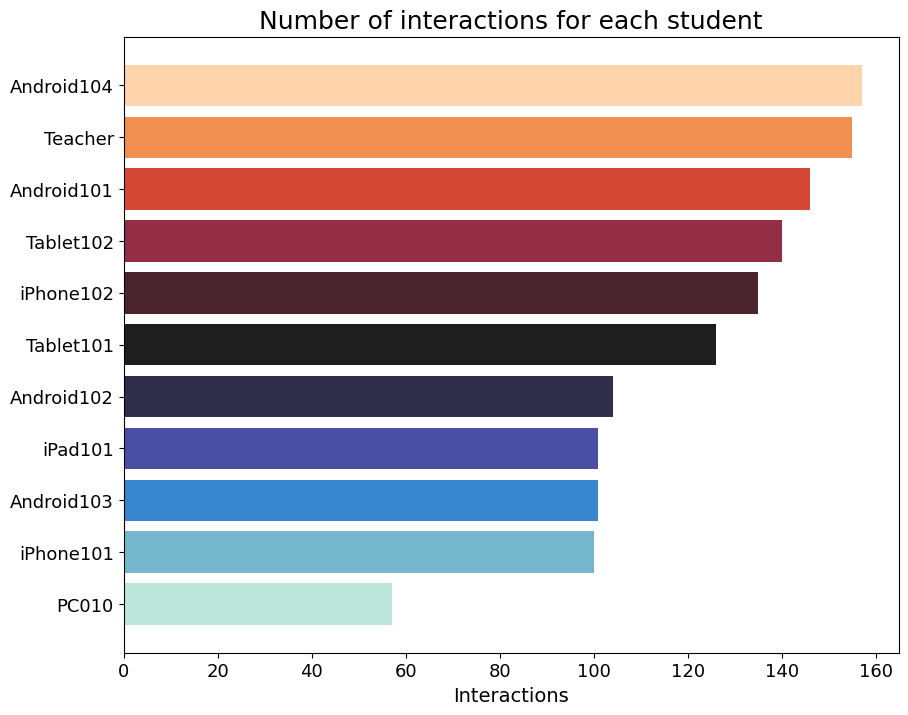

In [22]:
colors = [cmap(i) for i in np.linspace(0, 1, len(interactions))]

fig = plt.figure(figsize=(10, 8))
plt.barh(interactions.index, interactions['count'], color=colors, align='center')
plt.title('Number of interactions for each student')
plt.xlabel('Interactions')
plt.show()

The interesting aspect to analyse is whether there is any correlation between the number of interactions for each student and the answers they have given to the survey questions. Similar to what we did in the previos analysis, we will follow two statistical approaches:

1) **Correlation analysis**: We will investigate whether there is a correlation between the number of interactions and the average scores given to the questions by the students. To do this, we will calculate the Pearson correlation coefficient and the corresponding p-value. The Pearson correlation coefficient measures the strength and direction of the linear relationship between the interactions and the scores, and the p-value indicates whether this relationship is statistically significant. If the p-value is below a significance level of 0.05, we can conclude that there is evidence of a significant correlation between the interactions and the survey scores.

2) **Hypothesis testing**: We will also perform a hypothesis test to investigate whether the survey answers given by students who had a high number of interactions are significantly different from the survey answers given by students who had a low number of interactions. We will perform a two-sample t-test assuming equal variances, which returns the t-statistic and the corresponding p-value. As in the previous analysis, if the p-value is below 0.05, we can conclude that there is evidence of a significant difference in survey answers between the two groups.

In the test performed at the Deusto school, the number of students and datapoints is even less than in the previous school, so we do not expect to find statistically significant results... but let's check it out

In [27]:
interactions = interactions.reset_index()
int_df = student_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_pc_df = pc_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_mobile_df = mobile_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)

In [28]:
from scipy.stats import ttest_ind, pearsonr

high_interactions = int_df["mean"][int_df["count"] >= int_df["count"].mean()]
low_interactions = int_df["mean"][int_df["count"] < int_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_df["count"], int_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.12390836192818573
P-value: 0.9044445156045694

Pearson correlation coefficient: 0.3186355927203177
P-value: 0.3695449454543095


In [29]:
high_interactions = int_mobile_df["mean"][int_mobile_df["count"] >= int_mobile_df["count"].mean()]
low_interactions = int_mobile_df["mean"][int_mobile_df["count"] < int_mobile_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_mobile_df["count"], int_mobile_df["mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.847408834888452
P-value: 0.4247896990755585

Pearson correlation coefficient: -0.39674909649278156
P-value: 0.2904045030347044


We don't perform the analysis for the PC users, since we only have one data point here.
The p-values are below the significance level of 0.05 we have set, but the correlation coefficients are quite different from zero... it is strange that the correlation coefficient shows a positive correlation in one case, and a negative one when only considering mobile users.


In [31]:
int_mobile_df["count"]

0    146
1    100
2    157
3    126
4    101
5    140
6    101
7    135
8    104
Name: count, dtype: int64

In [32]:
int_mobile_df["mean"]

0    3.10
1    3.70
2    3.75
3    3.90
4    4.00
5    4.10
6    4.25
7    4.40
8    4.40
Name: mean, dtype: float64

In [33]:
int_df["mean"]

0    2.666667
1    3.100000
2    3.700000
3    3.750000
4    3.900000
5    4.000000
6    4.100000
7    4.250000
8    4.400000
9    4.400000
Name: mean, dtype: float64

In [34]:
int_df["count"]

0     57
1    146
2    100
3    157
4    126
5    101
6    140
7    101
8    135
9    104
Name: count, dtype: int64